# Gradient Descent (Iris datasæt)

Gradient Descent anvendt på Iris-datasæt under samme omstændighderne og opstilling som det primære program.

**Importerering og konfiguration af biblioteker**

In [28]:
# Importerer biblioteker
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
pd.set_option('precision', 3)
plt.rcParams['figure.figsize'] = (12.0, 9.0)

**Importering af datasæt**

In [29]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv" # URL/link til datasæt
columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'] # omdøber kolonnerne
dataset = pd.read_csv(url, names=columns) # importerer datasættet

**Omformer værdier for X og y til enkel dimension**

In [30]:
# Omformer data til en enkel dimension, så de passer sammen.
X = dataset['petal-width'].values.reshape(-1,1) 
y = dataset['petal-length'].values.reshape(-1,1)

**Splitter datasæt med trænings- og testdata**

In [31]:
# Splitter data til test- og træningsdata.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

**Tegner et scatterplot for testdata**

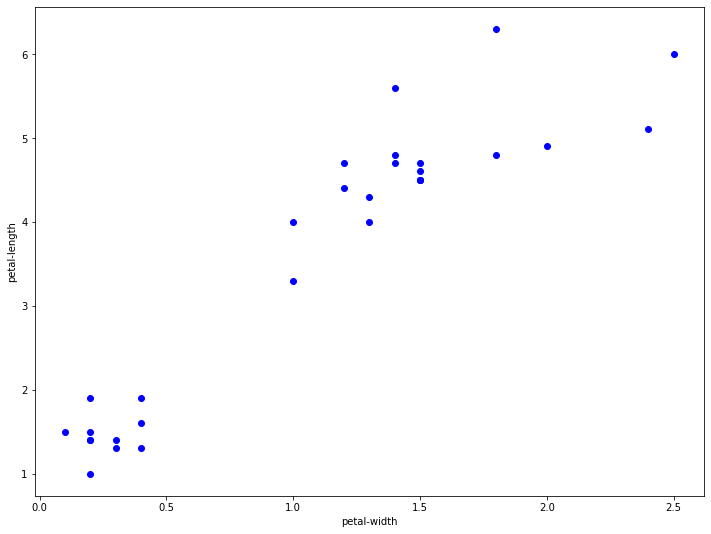

In [33]:
# Tegner et scatterplot
plt.scatter(X_test, y_test, color='blue')
plt.xlabel("petal-width")
plt.ylabel("petal-length")
plt.show()

**Definerer variabler**

In [34]:
a = 0 # Hældningen
b = 0 # Skæringspunktet med y-aksen

L = 0.01 # Læringsraten
epochs = 1000 # Antallet af iterationer

n = float(len(X)) # Antallet af elementer i X

**Gradient Descent**

In [35]:
start_time = time.time() # Starter tidstagning.

for i in range(epochs):
    Y_pred = a*X_train + b # Nuværende forudsagt værdi af Y
    D_a = (-2/n) * sum(X_train * (y_train - Y_pred)) # Differentieret a
    D_b = (-2/n) * sum(y_train - Y_pred) # Differentieret b
    a = a - L * D_a # Opdaterer værdien af a
    b = b - L * D_b # Opdateret værdien af b

print(time.time() - start_time, "sekunder") # Slutter tidstagning og printer resultatet.

0.12282896041870117 sekunder


**Printer a og b**

In [36]:
# Printer a og b
print("a = " + str(a) + "\nb = " + str(b))

a = [2.21928138]
b = [1.08619927]


**Sammenligner X_test med forudsagte værdier**

In [37]:
Y_pred = a*X_test + b # Forudsigelse

In [38]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': Y_pred.flatten()}) # Aktuel data vs forudsagt data
df # Kalder rammen

,Actual,Predicted
0,5.1,6.412
1,4.0,3.305
2,1.4,1.530
3,6.3,5.081
4,1.5,1.530
5,6.0,6.634
6,1.3,1.752
7,4.7,4.415
8,4.8,4.193
9,4.0,3.971


**Plotter testdata og vores regressionslinje**

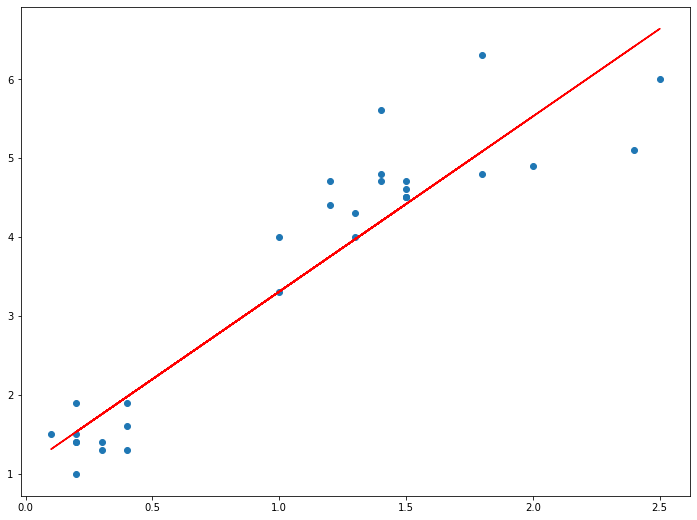

In [39]:
Y_pred = a*X_test + b # Forudsigelse
plt.scatter(X_test, y_test) # Scatterplot for testdata
#plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # Regressionslinjen
plt.plot(X_test, Y_pred, color='red') # Plotter funktionen med vores forudsigelsesdata. 
plt.show() # Viser plottet. a

**Beregner fejl af regressionslinjen**

In [41]:
# Printer beregning af fejl
print("Korrelationskoefficient:", r2_score(y_test, Y_pred))
print("MSE: ", mean_squared_error(y_test, Y_pred))

Korrelationskoefficient: 0.8773059187090615
MSE:  0.3385661377169253
